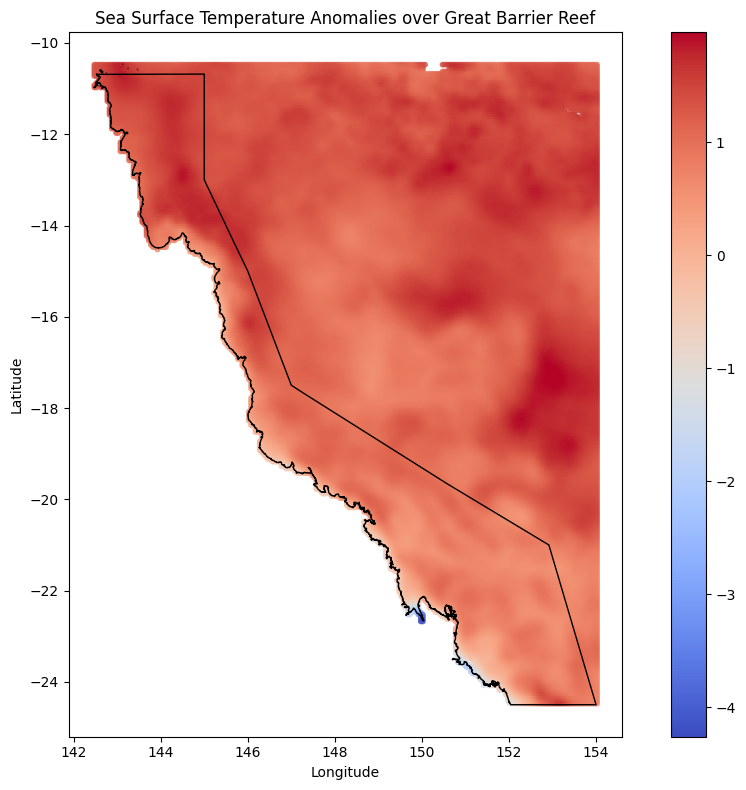

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile
shapefile_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\shapefile_gbr\worldheritagemarineprogramme.shp"
region = gpd.read_file(shapefile_path)

# Load filtered SST anomaly data
csv_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\latest_sst_anomaly.csv"
sst_data = pd.read_csv(csv_path, skiprows=[1])

# Convert SST DataFrame to GeoDataFrame
sst_gdf = gpd.GeoDataFrame(
    sst_data,
    geometry=gpd.points_from_xy(sst_data['longitude'], sst_data['latitude']),
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# First plot SST anomalies (heatmap)
sst_gdf.plot(
    ax=ax,
    column='sea_surface_temperature_anomaly',
    cmap='coolwarm',
    legend=True,
    markersize=10,
    alpha=0.7
)

# Then overlay the GBR region outlines
region.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

plt.title("Sea Surface Temperature Anomalies over Great Barrier Reef")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd

# Load GBR shapefile
gbr_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\shapefile_gbr\worldheritagemarineprogramme.shp"
gbr = gpd.read_file(gbr_path)

# Load SST anomaly data
csv_path = r"C:\Users\AdrienSourdille\Coral_Bleaching_Live_Map\data\raw\latest_sst_anomaly.csv"
sst_df = pd.read_csv(csv_path, skiprows=[1])

# Convert SST data to GeoDataFrame
sst_gdf = gpd.GeoDataFrame(
    sst_df,
    geometry=gpd.points_from_xy(sst_df['longitude'], sst_df['latitude']),
    crs="EPSG:4326"
)

# Spatial join: keep only points within GBR polygon
sst_within_gbr = gpd.sjoin(sst_gdf, gbr, predicate='within', how='inner')

# Compute average anomaly
mean_anomaly = sst_within_gbr['sea_surface_temperature_anomaly'].mean()

print(f"Average SST anomaly inside the GBR zone: {mean_anomaly:.4f}°C")


Average SST anomaly inside the GBR: 0.9241°C
